In [ ]:
import io, os, bisect
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def sol() :
  def desc(n) : #n초안에 적어도 한 문제를 풀 수 있게끔 배치할 수 있는지의 여부 반환
    x = bisect.bisect_left(L, n) #푸는 시간이 n 보다 작은 문제의 개수 
    needed = 0 #x번째 문제부터 큰 수는 n으로 나눈 몫만큼 풀 수 있음
    for v in L[x:] :
      needed += v // n
    debug(needed, x, n)
    return needed <= x

  N = int(input())
  L = [*map(int, input().split())]
  L.sort()

  lo, hi = 0, 10**9 + 1
  while lo + 1 < hi:
    mid = (lo + hi) // 2
    if desc(mid):
      hi = mid
      ans = mid
    else:
      lo = mid

  print(ans)

sol()

7
3 4 5 9 10 14 15

In [ ]:
import io, os, bisect
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def sol() :
  def desc(n) : #n초안에 적어도 한 문제를 풀 수 있게끔 배치할 수 있는지의 여부 반환
    x = bisect.bisect_right(L, n) #푸는 시간이 n 보다 작은 문제의 개수 
    delta = 0
    for v in L[x:] :
      delta += (v-1) // n - 1
    return x - delta > 0

  N = int(input())
  L = [*map(int, input().split())]
  L.sort()

  lo, hi = 0, 10**9 + 1
  while lo + 1 < hi:
    mid = (lo + hi) // 2
    if desc(mid):
      hi = mid
      ans = mid
    else:
      lo = mid

  print(ans)

sol()

### 자력솔 (with 태그 힌트)
- 지문에 `최댓값이 최소가 되도록 ~`을 봤을 때 매개변수 탐색을 생각했어야 했다.
- 관찰 1. 옥토끼는 동시에 2개의 문제를 풀 수 있고, n초 이내에 적어도 한 문제 이상 풀면 된다.
- 그리디 접근 -> n칸마다 두줄의 격자가 있다고 상상했을 때, 위 아래의 격자 중 적어도 하나의 격자칸에서 문제를 풀 수 있다면 그렇게 배치할 수 있는 것이다.
  - n초이하 문제들은 그것보다 긴 문제들을 푸는데에 비는 간격들에 대해서 보충해줄 수 있다.
  - n초를 초과하는 문제들은 그렇지 않은 문제들을 적어도 n초 간격마다 한개씩 필요로 한다.
  - 나머지는 매개변수가 예제의 입력이 나오도록 적당히 조절해줬다.
    - 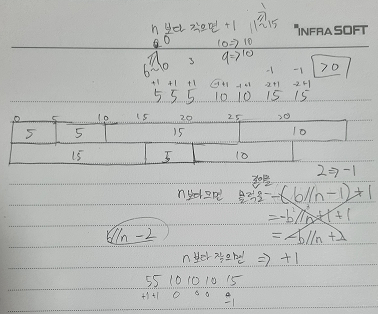